In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time


def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w_h, w_h2, w_o, p_keep_input, p_keep_hidden): # this network is the same as the previous one except with an extra hidden layer + dropout
    X = tf.nn.dropout(X, p_keep_input)
    h = tf.nn.relu(tf.matmul(X, w_h))

    h = tf.nn.dropout(h, p_keep_hidden)
    h2 = tf.nn.relu(tf.matmul(h, w_h2))

    h2 = tf.nn.dropout(h2, p_keep_hidden)

    return tf.matmul(h2, w_o)


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
code_trX, trY, code_teX, teY = np.load("data/code/train.npz.npy"), mnist.train.labels, np.load("data/code/test.npz.npy"), mnist.test.labels
trX, teX=mnist.train.images,mnist.test.images

X = tf.placeholder("float", [None, 784])


Y = tf.placeholder("float", [None, 10])

w_h = init_weights([784, 625])

w_h2 = init_weights([625, 625])
w_o = init_weights([625, 10])

p_keep_input = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w_h, w_h2, w_o, p_keep_input, p_keep_hidden)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# Launch the graph in a session
accuracy=[]
raw_start=time.time()
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                          p_keep_input: 0.8, p_keep_hidden: 0.5})
        accuracy.append(np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX, 
                                                         p_keep_input: 1.0,
                                                         p_keep_hidden: 1.0})))
raw_end=time.time()

In [3]:
X_code = tf.placeholder("float",[None,30])
w_h_code=init_weights([30,625])
py_x_code = model(X_code, w_h_code, w_h2, w_o, p_keep_input, p_keep_hidden)
cost_code = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x_code, labels=Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost_code)
predict_op = tf.argmax(py_x_code, 1)

In [4]:
accuracy_code=[]
code_start=time.time()
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X_code: code_trX[start:end], Y: trY[start:end],
                                          p_keep_input: 0.8, p_keep_hidden: 0.5})
        accuracy_code.append(np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X_code: code_teX, 
                                                         p_keep_input: 1.0,
                                                         p_keep_hidden: 1.0})))
code_end=time.time()

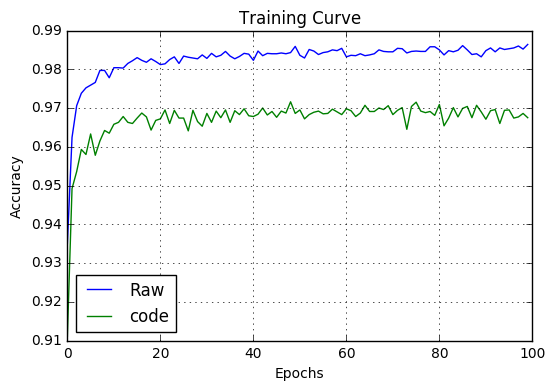

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(accuracy)),accuracy,label=str("Raw"))
plt.plot(range(len(accuracy_code)),accuracy_code,label=str("code"))
plt.grid()
plt.legend(loc='best')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Curve")

In [6]:
print("Raw : %f" %(raw_end-raw_start))
print("Code : %f" %(code_end-code_start))

Raw : 113.919600
Code : 87.185159
